<H2>Credit Card Kaggle Anamoly Detection </H2>

<H4>Content</H4>
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [14]:
import numpy as np
import pandas as pd 

In [ ]:
df = pd.read_csv("Dataset\\creditcard.csv")

In [16]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
df.shape

(284807, 31)

In [21]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [22]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
# df_filled = df.fillna(df.mean())

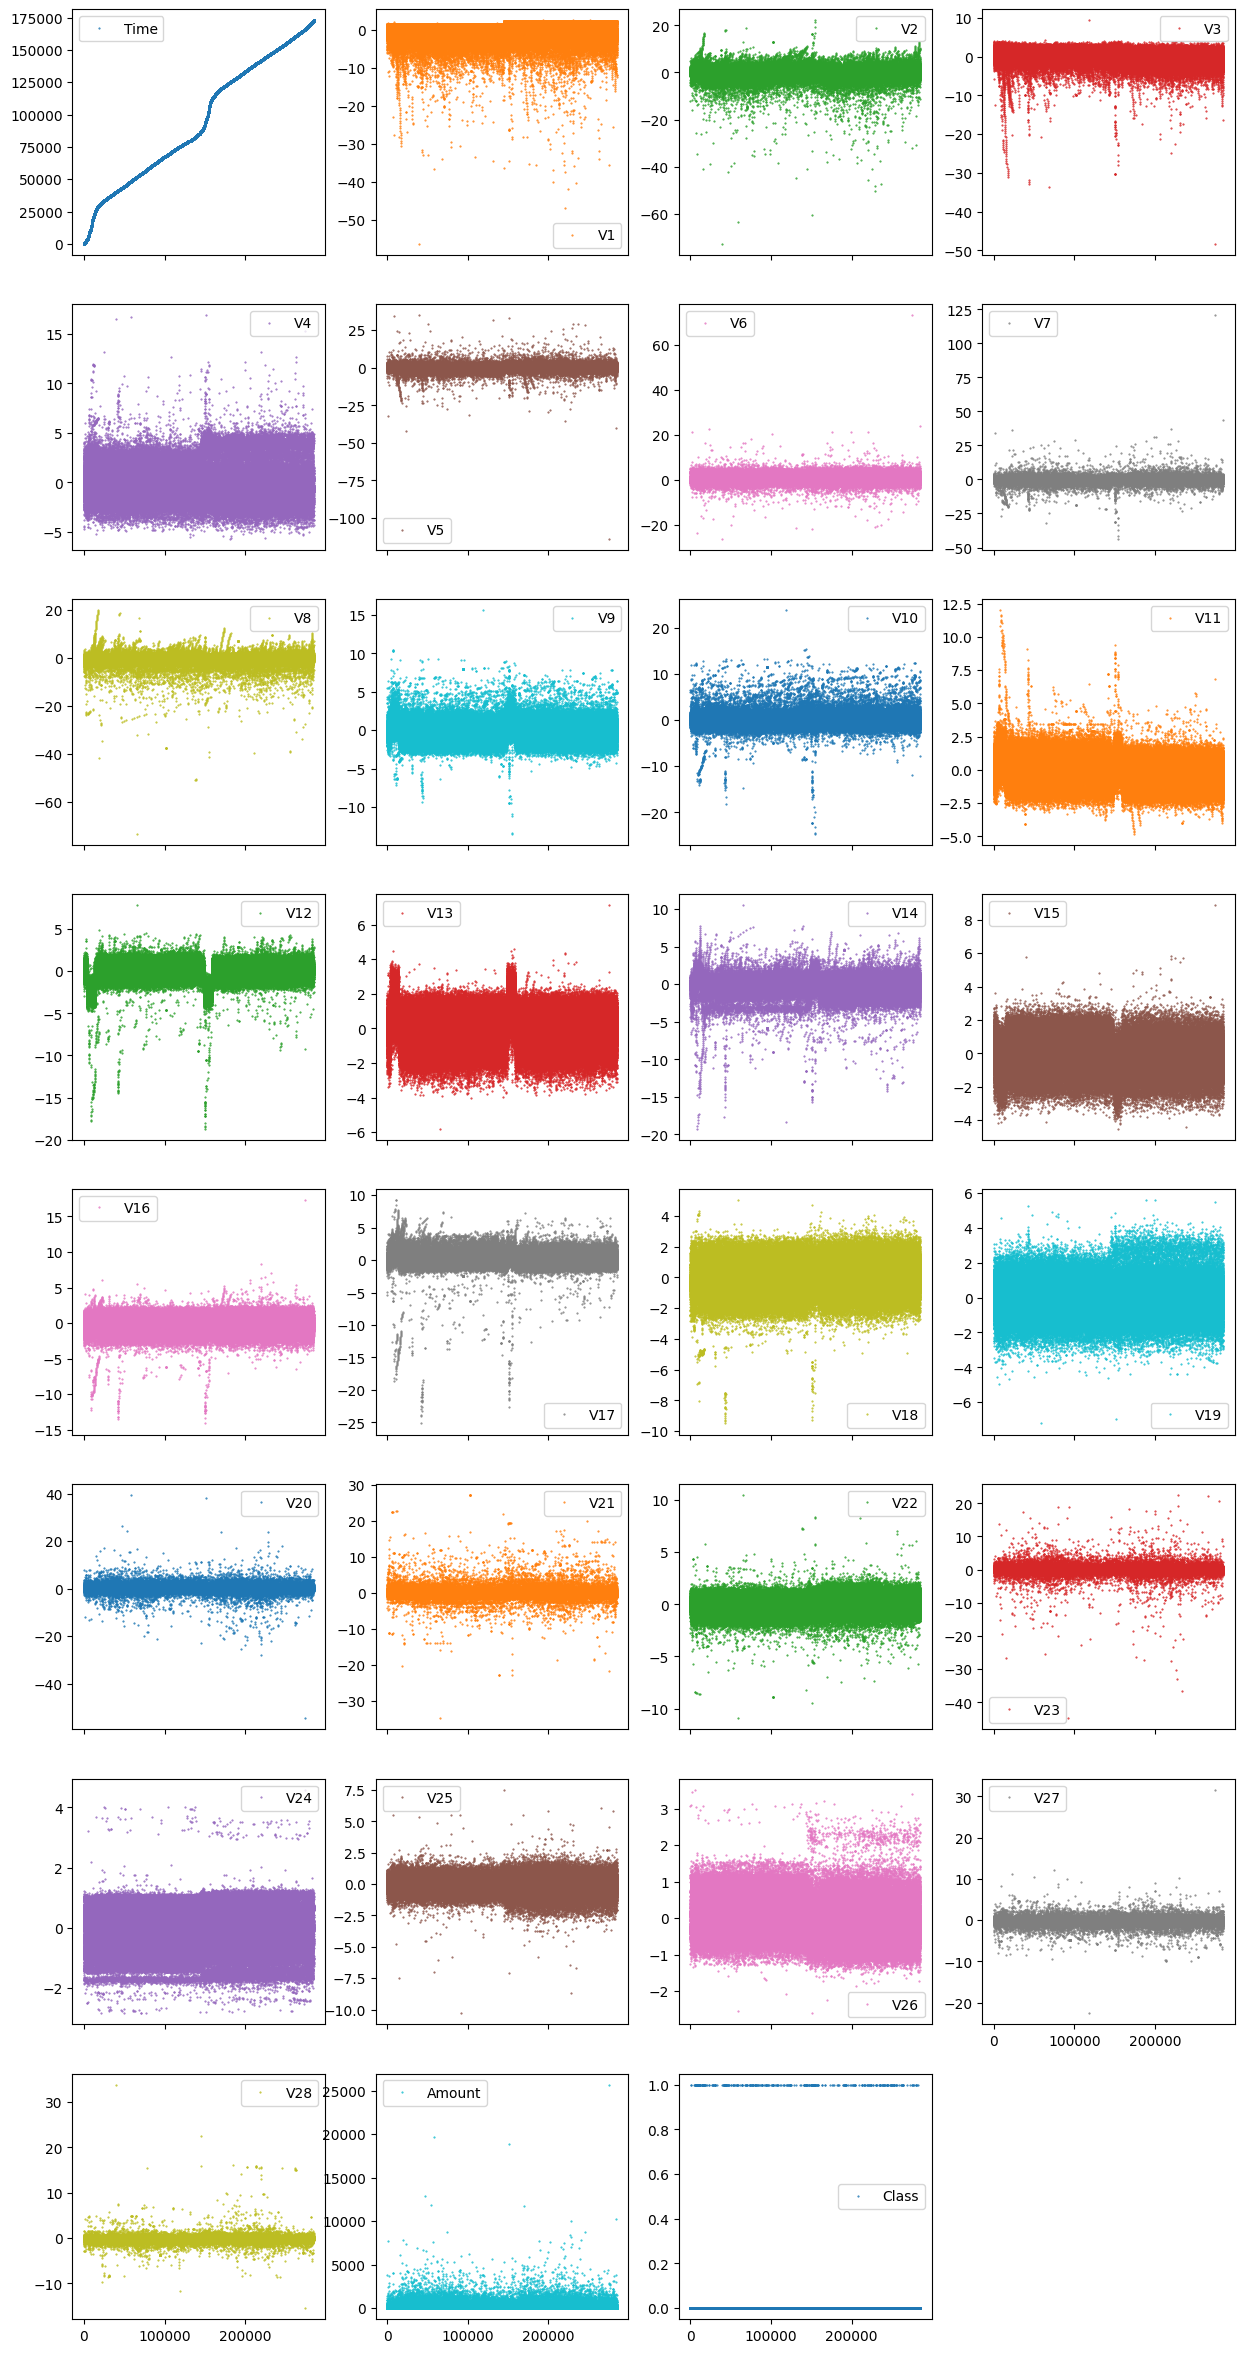

In [26]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

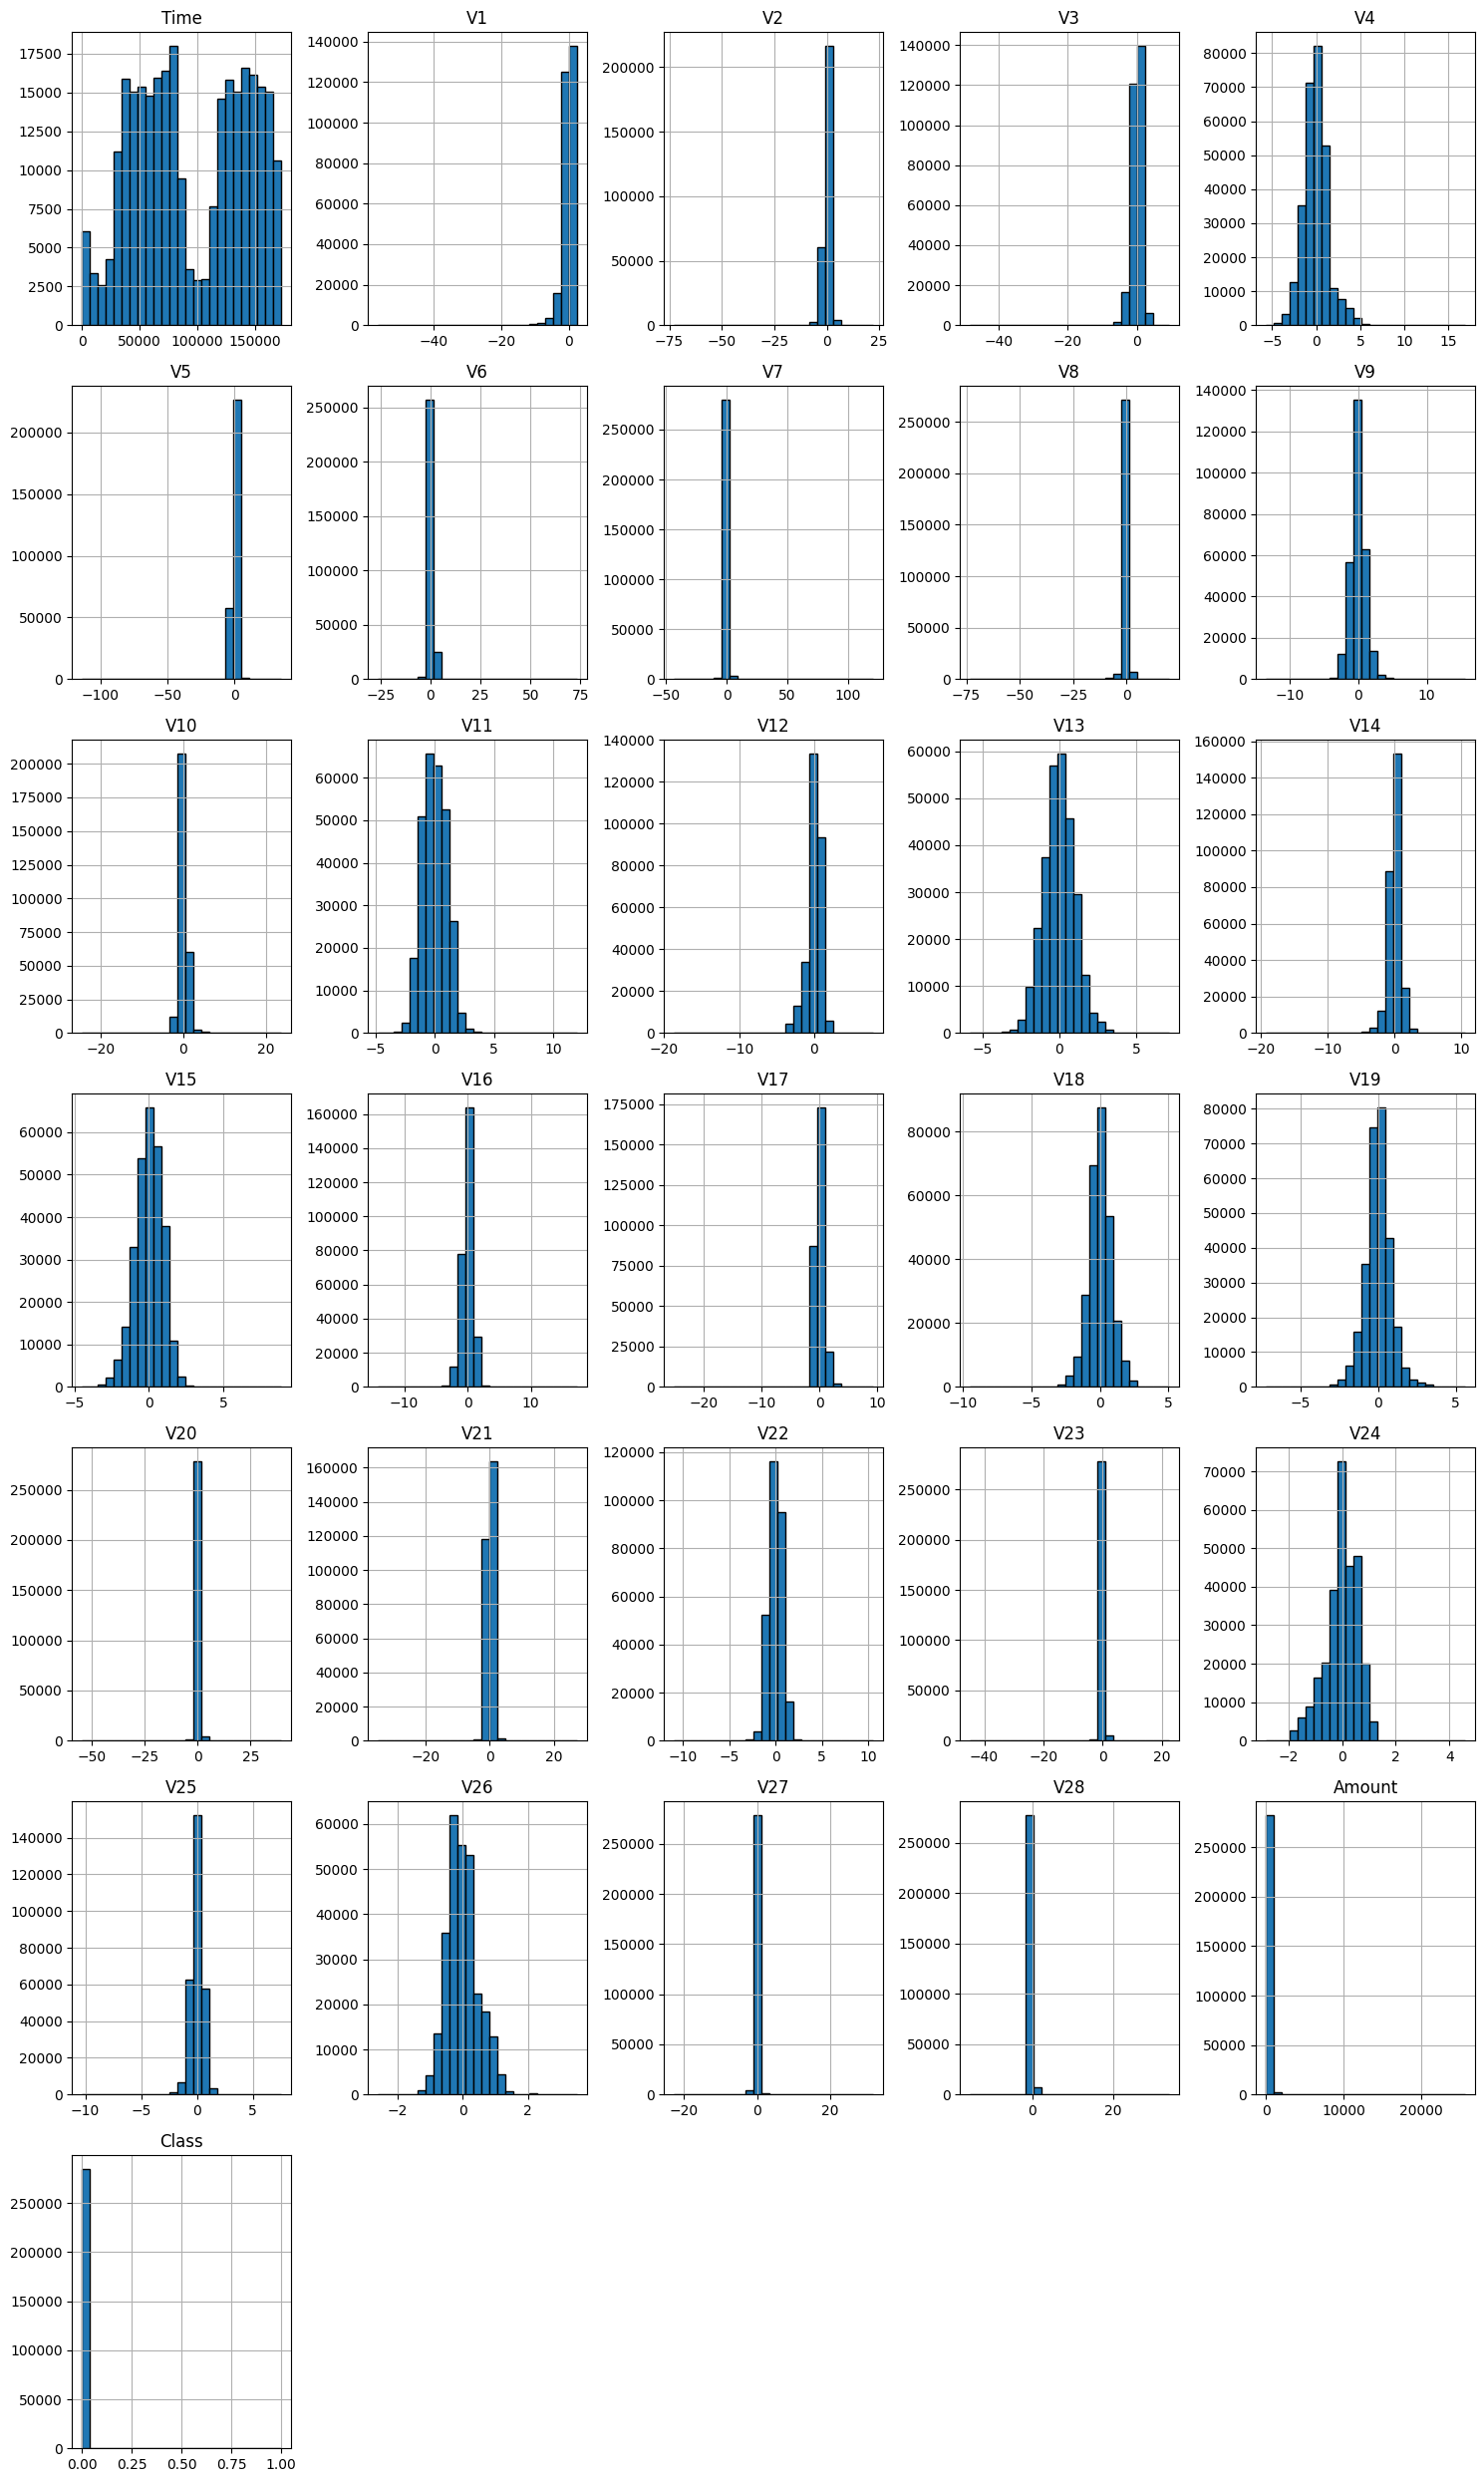

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [ ]:
import pandas as pd

# Initialize empty lists to store fraudulent and normal transactions
fraud_data = []
normal_data = []

# Iterate through each row
for i in range(len(df)):
    if df.loc[i, 'Class'] == 1:
        # If the Class is 1, it's a fraudulent transaction, append it to fraud_data list
        fraud_data.append(df.iloc[i])
    else:
        # Otherwise, it's a normal transaction, append it to normal_data list
        normal_data.append(df.iloc[i])

df_fraud = pd.DataFrame(fraud_data)
df_normal = pd.DataFrame(normal_data)

df_fraud.reset_index(drop=True, inplace=True)
df_normal.reset_index(drop=True, inplace=True)

print("Fraudulent Transactions:")
print(df_fraud)

print("\nNon-Fraudulent Transactions:")
print(df_normal)


Fraudulent Transactions:
         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
487  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
488  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
489  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
490  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
491  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

           V7        V8        V9  ...       V21  

In [28]:
A = df_fraud.value_counts()
B = df_normal.value_counts()
print(A)

Time      V1          V2         V3          V4        V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
68207.0   -13.192671  12.785971  -9.906650   3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00    1.0      6
94362.0   -26.457745  16.497472  -30.177317  8.904157  -17.892600  -1.227904  -31.197329  -11.438920  -9.462573  -22.187089   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896538   0.254836  -0.738097  -0.966564  -7.26

In [29]:
df_fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [30]:
df_fraud["Time"].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [31]:
df_normal["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [32]:
df_normal["Time"].describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

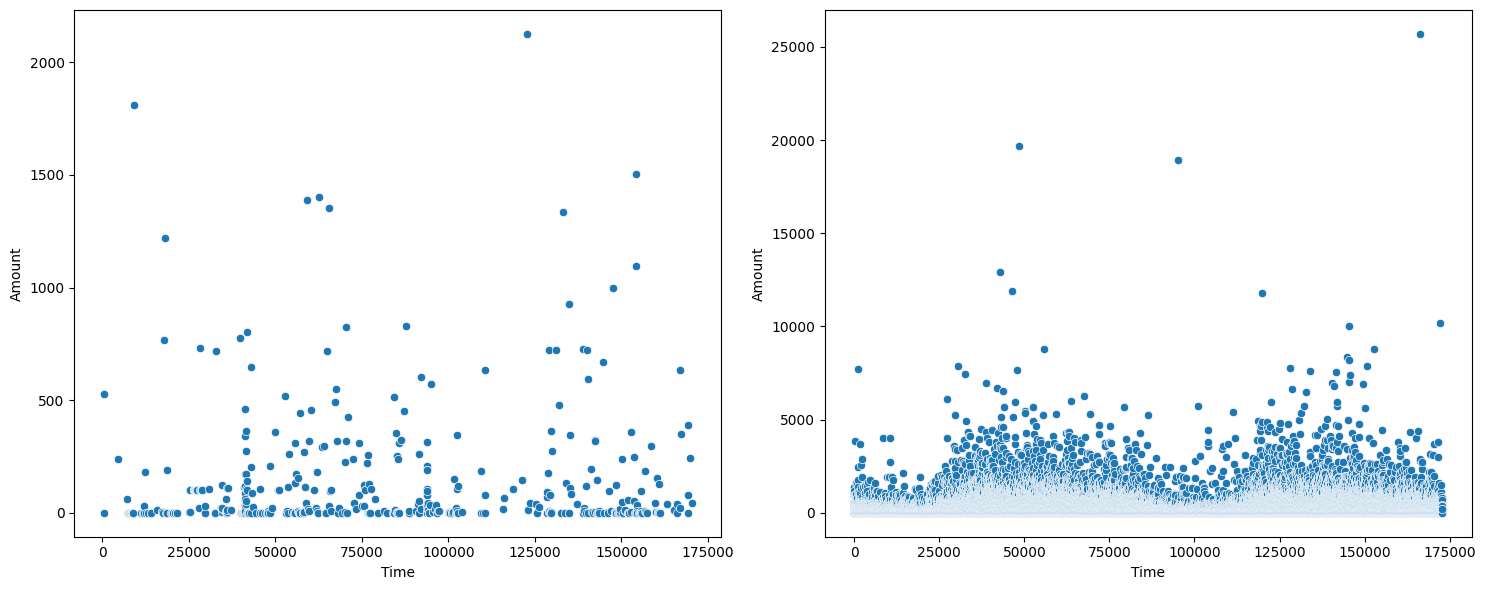

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x="Time", y="Amount", data=df_fraud, ax=axes[0])
sns.scatterplot(x="Time", y="Amount", data=df_normal, ax=axes[1])

plt.tight_layout()
plt.show()


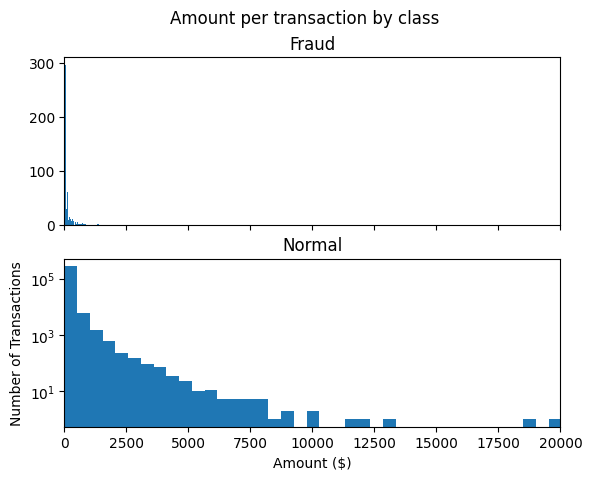

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(df_fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(df_normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

<Axes: xlabel='Time', ylabel='Amount'>

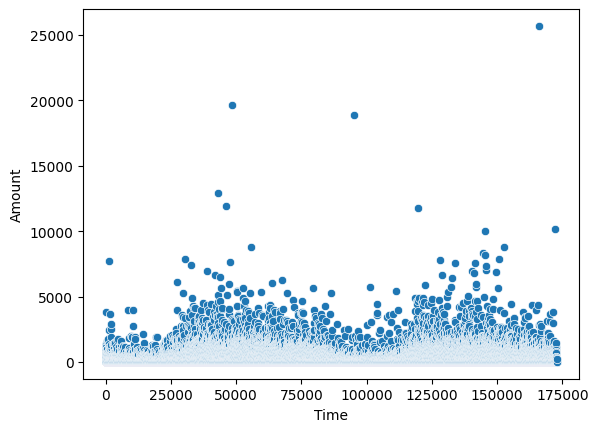

In [ ]:
sns.scatterplot(x="Time",y="Amount",data = df)

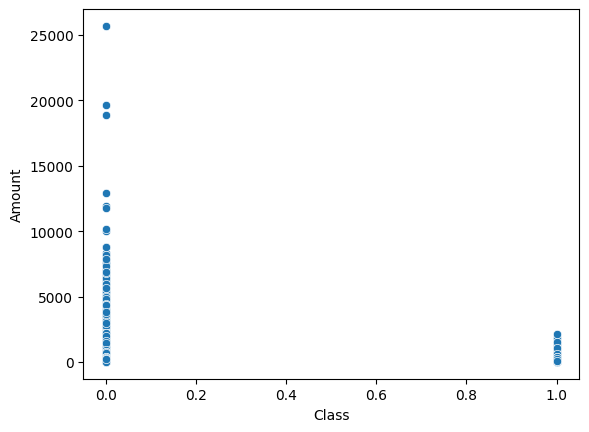

In [ ]:
b = sns.scatterplot(x="Class",y="Amount",data = df,legend='auto')

# Feature Selection From correlation

<Axes: >

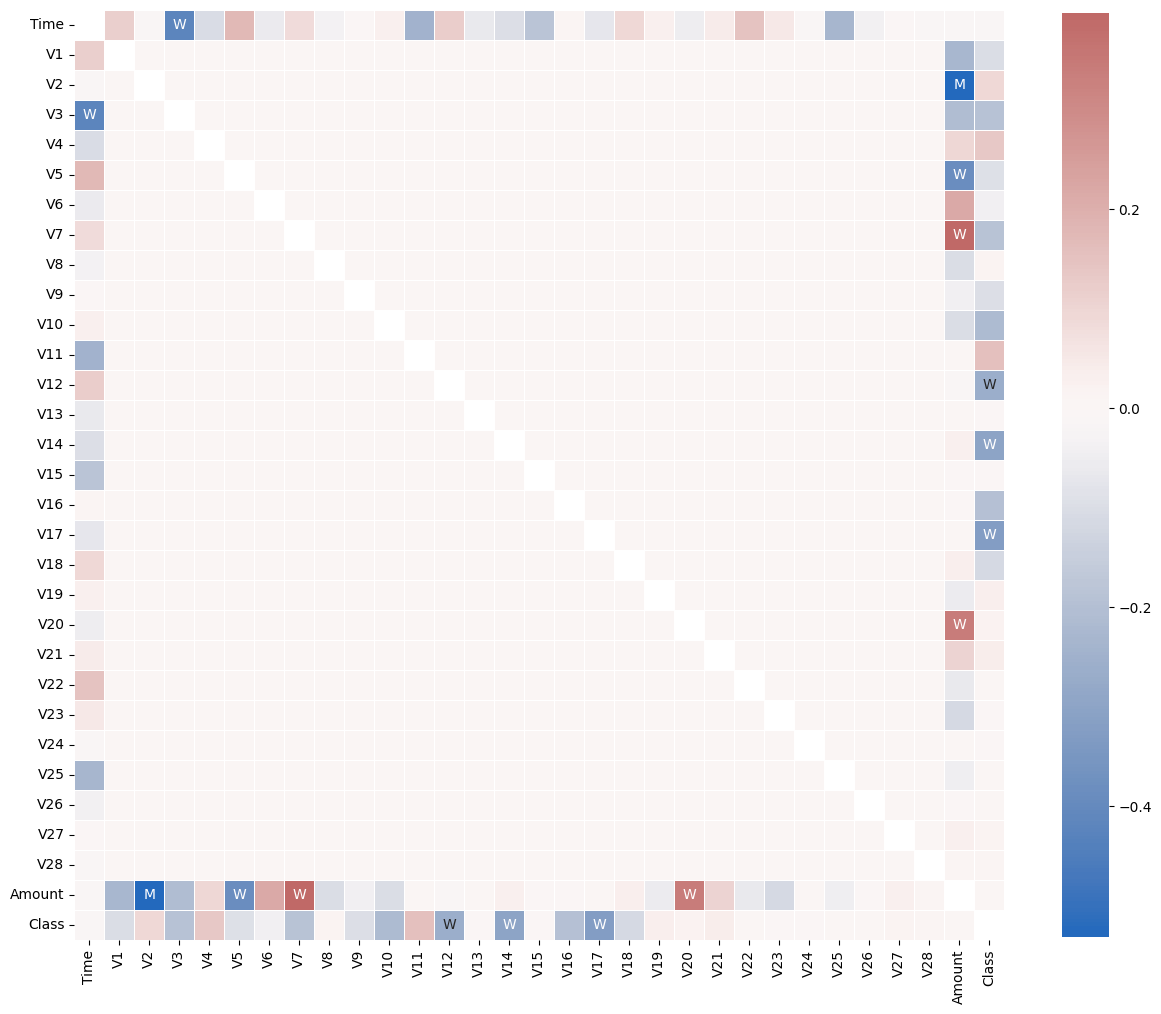

In [ ]:
import matplotlib.pyplot as plt
df_corr = df.corr(method = 'pearson')
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))
plt.figure(figsize=(15, 15))
sns.heatmap(data = df_corr,mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [ ]:
count =0
for i in range(len(df)):
  if (df['Class']== 1.0).any() :
    count = count +1
print(count)

In [ ]:
len(df['Class'])

284807

<H2>Model Prediction</H2>

<H3>Isolation Forest Algorithm :</H3>
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

<H3>Local Outlier Factor(LOF) Algorithm</H3>
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [38]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [ ]:
feature_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
                   'V17', 'V18', 'V19', 'V20', 'V21', 'Amount', 'Time']
X = df[feature_columns]
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
state = np.random.RandomState(42)
X_outliers = state.uniform(low=0, high=1, size=(X_train.shape[0], X_test.shape[1]))
outlier_fraction = len(df_fraud)/float(len(df_normal))

In [41]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)  
}

In [ ]:
n_outliers = len(df_fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):

    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_test)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_test)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_test).sum()

    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_test,y_pred))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_iforest.py:307: UserWarning: max_samples (284807) is greater than the total number of samples (199364). max_samples will be set to n_samples for estimation.
  warn(


Isolation Forest: 175
Accuracy Score :
0.9979518509415634
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.35      0.34      0.34       136

    accuracy                           1.00     85443
   macro avg       0.68      0.67      0.67     85443
weighted avg       1.00      1.00      1.00     85443

Local Outlier Factor: 282
Accuracy Score :
0.9966995540886907
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.01      0.01      0.01       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize the classifiers
rf_clf = RandomForestClassifier(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
lr_clf = LogisticRegression(random_state=42,  max_iter=10000)

# Train the classifiers
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)


In [ ]:
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))
print("\nDecision Tree Classification Report")
print(classification_report(y_test, dt_pred))
print("\nLogistic Regression Classification Report")
print(classification_report(y_test, lr_pred))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.80      0.86       136

    accuracy                           1.00     85443
   macro avg       0.96      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443


Decision Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.83      0.76       136

    accuracy                           1.00     85443
   macro avg       0.85      0.92      0.88     85443
weighted avg       1.00      1.00      1.00     85443


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.74      0.67      0.70       136

    accuracy                           1.00     85443
   macro avg

Random Forest ROC AUC: 0.9617970199673291
Decision Tree ROC AUC: 0.9151539784680798
Logistic Regression ROC AUC: 0.9295420208947752


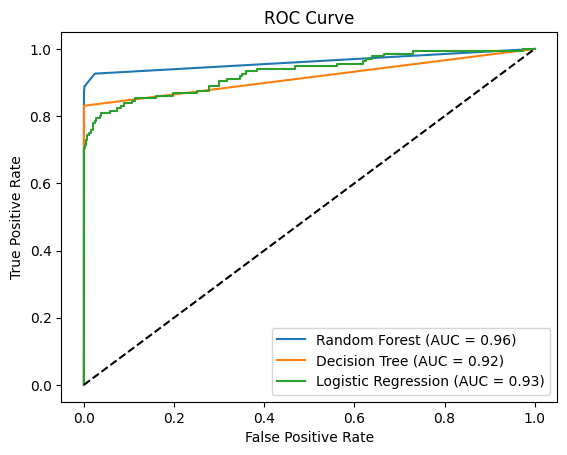

In [ ]:
# Compute ROC AUC scores
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
dt_roc_auc = roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:, 1])
lr_roc_auc = roc_auc_score(y_test, lr_clf.predict_proba(X_test)[:, 1])

print(f"Random Forest ROC AUC: {rf_roc_auc}")
print(f"Decision Tree ROC AUC: {dt_roc_auc}")
print(f"Logistic Regression ROC AUC: {lr_roc_auc}")

# Compute ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_clf.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_clf.predict_proba(X_test)[:, 1])

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure()
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # This statement adds reference line to plot 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best') # place legend where there is least amount of important data 
plt.show()

IMP : Confusion Matrix is not considered for Unbalanced dataset.